# Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Loading our Dataset

In [2]:
dataset = pd.read_csv('pima-indians-diabetes.csv')

In [3]:
dataset.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,6,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,1,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,8,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,1,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [4]:
dataset.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

# Normalizing columns

In [5]:
normalized_cols = ['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps', 'Insulin', 'BMI', 'Pedigree']

In [6]:
dataset[normalized_cols] = dataset[normalized_cols].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

In [7]:
dataset.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


# Importing Tensorflow

In [8]:
import tensorflow as tf

C:\Users\Eshban\Anaconda3\envs\100daysofmlcode\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


# Our Continous Numeric Feature Columns

In [9]:
num_preg = tf.feature_column.numeric_column('Number_pregnant')
plasma_gluc = tf.feature_column.numeric_column('Glucose_concentration')
dias_bp = tf.feature_column.numeric_column('Blood_pressure')
tricep = tf.feature_column.numeric_column('Triceps')
insulin = tf.feature_column.numeric_column('Insulin')
bmi = tf.feature_column.numeric_column('BMI')
diab_pdg = tf.feature_column.numeric_column('Pedigree')
age = tf.feature_column.numeric_column('Age')

In [10]:
assigned_group = tf.feature_column.categorical_column_with_vocabulary_list('Group',['A','B','C','D'])

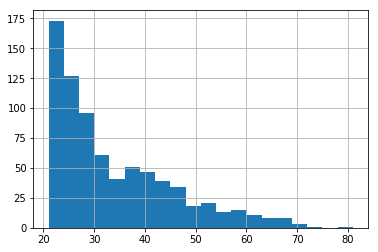

In [11]:
dataset['Age'].hist(bins = 20)

In [12]:
age_buckets = tf.feature_column.bucketized_column(age, boundaries=[20,30,40,50,60,70,80])

In [13]:
feat_cols = [num_preg, plasma_gluc, dias_bp, tricep, insulin, bmi, diab_pdg, assigned_group, age_buckets]

In [14]:
dataset.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [15]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
Number_pregnant          768 non-null float64
Glucose_concentration    768 non-null float64
Blood_pressure           768 non-null float64
Triceps                  768 non-null float64
Insulin                  768 non-null float64
BMI                      768 non-null float64
Pedigree                 768 non-null float64
Age                      768 non-null int64
Class                    768 non-null int64
Group                    768 non-null object
dtypes: float64(7), int64(2), object(1)
memory usage: 60.1+ KB


# Input data

In [16]:
X = dataset.drop('Class', axis=1)

# Output Labels

In [17]:
y = dataset['Class']

# Performing our Train Test Split

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

# Input function

In [20]:
input_function = tf.estimator.inputs.pandas_input_fn(x=X_train, y=y_train, batch_size=10, num_epochs=100, shuffle=True)

# Instantiating Linear Classifier

In [21]:
classifier = tf.estimator.LinearClassifier(feature_columns=feat_cols, n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\Eshban\\AppData\\Local\\Temp\\tmpy8h829lj', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001E8FD46A2B0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


# Training our Linear Classifier

In [22]:
classifier.train(input_fn=input_function, steps = 1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\Eshban\AppData\Local\Temp\tmpy8h829lj\model.ckpt.
INFO:tensorflow:loss = 6.931472, step = 1
INFO:tensorflow:global_step/sec: 166.084
INFO:tensorflow:loss = 5.0973854, step = 101 (0.609 sec)
INFO:tensorflow:global_step/sec: 337.601
INFO:tensorflow:loss = 5.7572446, step = 201 (0.295 sec)
INFO:tensorflow:global_step/sec: 356.821
INFO:tensorflow:loss = 4.9071746, step = 301 (0.281 sec)
INFO:tensorflow:global_step/sec: 325.545
INFO:tensorflow:loss = 3.3383493, step = 401 (0.306 sec)
INFO:tensorflow:global_step/sec: 371.361
INFO:tensorflow:loss = 4.7110066, step = 501 (0.268 sec)
INFO:tensorflow:global_step/sec: 350.583
INFO:tensorflow:loss = 4.7217484, step = 601 (0.284 sec)
INFO:tensorflow:global_step/

# Evaluation Input Function

In [23]:
eval_input_function = tf.estimator.inputs.pandas_input_fn(x=X_test, y=y_test, batch_size=10, num_epochs=1, shuffle=False)

In [24]:
result = classifier.evaluate(eval_input_function)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-10-02-18:36:11
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Eshban\AppData\Local\Temp\tmpy8h829lj\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-10-02-18:36:13
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.73593074, accuracy_baseline = 0.64935064, auc = 0.8000001, auc_precision_recall = 0.6397207, average_loss = 0.52501804, global_step = 1000, label/mean = 0.35064936, loss = 5.0532985, precision = 0.6666667, prediction/mean = 0.34952727, recall = 0.49382716
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: C:\Users\Eshban\AppData\Local\Temp\tmpy8h829lj\model.ckpt-1000


# Linear Classifier Evaluation Results 

In [25]:
result

{'accuracy': 0.73593074,
 'accuracy_baseline': 0.64935064,
 'auc': 0.8000001,
 'auc_precision_recall': 0.6397207,
 'average_loss': 0.52501804,
 'label/mean': 0.35064936,
 'loss': 5.0532985,
 'precision': 0.6666667,
 'prediction/mean': 0.34952727,
 'recall': 0.49382716,
 'global_step': 1000}

# Prediction Input Function

In [26]:
pred_input_function = tf.estimator.inputs.pandas_input_fn(x=X_test, batch_size=10, num_epochs=1, shuffle=False)

In [27]:
predictions = classifier.predict(pred_input_function)

In [28]:
list(predictions)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Eshban\AppData\Local\Temp\tmpy8h829lj\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


[{'logits': array([-0.00492537], dtype=float32),
  'logistic': array([0.49876863], dtype=float32),
  'probabilities': array([0.5012314, 0.4987687], dtype=float32),
  'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object)},
 {'logits': array([0.47863245], dtype=float32),
  'logistic': array([0.6174249], dtype=float32),
  'probabilities': array([0.38257512, 0.6174249 ], dtype=float32),
  'class_ids': array([1], dtype=int64),
  'classes': array([b'1'], dtype=object)},
 {'logits': array([-0.6116767], dtype=float32),
  'logistic': array([0.35167682], dtype=float32),
  'probabilities': array([0.6483232 , 0.35167682], dtype=float32),
  'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object)},
 {'logits': array([-0.7957581], dtype=float32),
  'logistic': array([0.31093362], dtype=float32),
  'probabilities': array([0.6890664 , 0.31093365], dtype=float32),
  'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object)},
 {'logits'

# Embedding our Feature Columns to be used in a DNN

In [29]:
embedded_group_column = tf.feature_column.embedding_column(assigned_group, dimension=4)

In [30]:
feat_cols = [num_preg ,plasma_gluc,dias_bp,tricep ,insulin,bmi, diab_pdg, embedded_group_column, age_buckets]

# New Input Function for our DNN Classifier

In [31]:
input_func = tf.estimator.inputs.pandas_input_fn(x=X_train,y=y_train,batch_size=10,num_epochs=1000,shuffle=True)

# Instantiating our DNN Classifier

In [32]:
dnn_classifier = tf.estimator.DNNClassifier(hidden_units=[50,30,10], feature_columns=feat_cols, n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\Eshban\\AppData\\Local\\Temp\\tmpo7tk_236', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001E8FDB73278>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


# Training our DNN Classifier

In [33]:
dnn_classifier.train(input_fn=input_function, steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\Eshban\AppData\Local\Temp\tmpo7tk_236\model.ckpt.
INFO:tensorflow:loss = 7.2373633, step = 1
INFO:tensorflow:global_step/sec: 169.984
INFO:tensorflow:loss = 4.2046556, step = 101 (0.593 sec)
INFO:tensorflow:global_step/sec: 284.851
INFO:tensorflow:loss = 3.8896701, step = 201 (0.355 sec)
INFO:tensorflow:global_step/sec: 302.01
INFO:tensorflow:loss = 5.844441, step = 301 (0.328 sec)
INFO:tensorflow:global_step/sec: 302.154
INFO:tensorflow:loss = 8.209411, step = 401 (0.337 sec)
INFO:tensorflow:global_step/sec: 239.266
INFO:tensorflow:loss = 6.2670627, step = 501 (0.414 sec)
INFO:tensorflow:global_step/sec: 250.451
INFO:tensorflow:loss = 3.8142576, step = 601 (0.394 sec)
INFO:tensorflow:global_step/se

# Evaluation Input Function for DNN Classifier

In [34]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test, y=y_test, batch_size=10, num_epochs=1, shuffle=False)

# Classification Results

In [35]:
dnn_classifier.evaluate(eval_input_func)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-10-02-18:36:33
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Eshban\AppData\Local\Temp\tmpo7tk_236\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-10-02-18:36:35
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.77056277, accuracy_baseline = 0.64935064, auc = 0.8296708, auc_precision_recall = 0.69987655, average_loss = 0.48915595, global_step = 1000, label/mean = 0.35064936, loss = 4.708126, precision = 0.7121212, prediction/mean = 0.3137576, recall = 0.5802469
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: C:\Users\Eshban\AppData\Local\Temp\tmpo7tk_236\model.ckpt-1000


{'accuracy': 0.77056277,
 'accuracy_baseline': 0.64935064,
 'auc': 0.8296708,
 'auc_precision_recall': 0.69987655,
 'average_loss': 0.48915595,
 'label/mean': 0.35064936,
 'loss': 4.708126,
 'precision': 0.7121212,
 'prediction/mean': 0.3137576,
 'recall': 0.5802469,
 'global_step': 1000}

# Comparison Table

|Parameters| Linear Classifier | DNN Classifier |
|----------------------------------------------|
|<b>Accuracy<b/> | 0.73593074| 0.77056277|
|<b>Loss<b/> | 5.0532985| 4.708126|
|<b>Precision</b> | 0.6666667| 0.7121212|
|<b>Prediction/ Mean <b/>| 0.34952727| 0.3137576|
|<b>Average Loss</b>| 0.52501804| 0.48915595|